https://lexfridman.com/fast-cross-correlation-and-time-series-synchronization-in-python/


### WAV_1  : 7채널 시뮬레이션 데이터의 MLDR의 결과
### WAV_2 : 시뮬레이션 생성에 사용된 Clean 스피치의 0번채널 음성

학습을 위해 둘의 싱크를 맞춰야한다.

In [1]:
import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2, fftshift

def cross_correlation_using_fft(x, y):
    f1 = fft(x)
    f2 = fft(np.flipud(y))
    cc = np.real(ifft(f1 * f2))
    return fftshift(cc)

# shift < 0 means that y starts 'shift' time steps before x # shift > 0 means that y starts 'shift' time steps after x
def compute_shift(x, y):
    assert len(x) == len(y)
    c = cross_correlation_using_fft(x, y)
    assert len(c) == len(x)
    zero_index = int(len(x) / 2) - 1
    shift = zero_index - np.argmax(c)
    return shift

In [24]:
import wave

mixed = wave.open('F01_22GC010A_BUS.wav','r')
clean = wave.open('F01_22GC010A_BTH.CH0.wav','r')

#len_1 = mixed.getnframes()
#len_2 = clean.getnframes()

data_1 = mixed.readframes(-1)
data_2 = clean.readframes(-1)

data_1 = np.fromstring(data_1, "Int16")
data_2 = np.fromstring(data_2, "Int16")

<ipython-input-24-2a5f40f083b4>:12: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  data_1 = np.fromstring(data_1, "Int16")
<ipython-input-24-2a5f40f083b4>:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data_1 = np.fromstring(data_1, "Int16")
<ipython-input-24-2a5f40f083b4>:13: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  data_2 = np.fromstring(data_2, "Int16")
<ipython-input-24-2a5f40f083b4>:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data_2 = np.fromstring(data_2, "Int16")


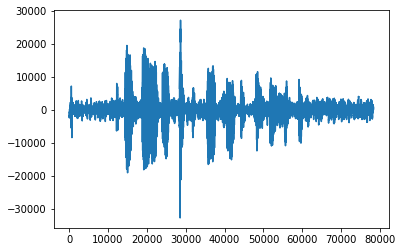

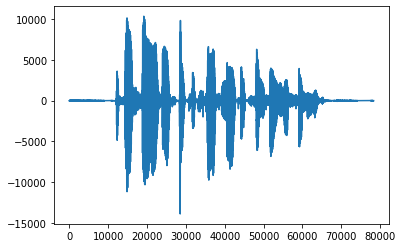

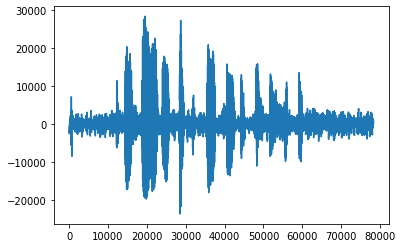

In [26]:
from matplotlib import pyplot as plt

plt.plot(data_1)
plt.show()

plt.plot(data_2)
plt.show()

plt.plot(data_1-data_2)
plt.show()



diff가 음인지 양인지도 잘 구분해야할것 같다.
wave 파일 길이가 다르면 안될거 같으니까 길이도 맞춰야한다. 

-10
78323
78323


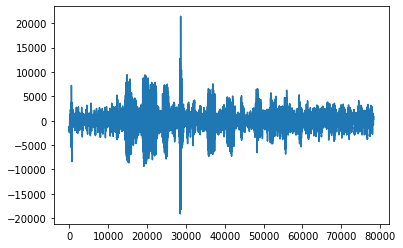

In [32]:
diff = compute_shift(data_1,data_2)
print(diff)

data_3 = data_1[-diff:]
data_4 = data_2[:len(data_3)]
print(len(data_3))
print(len(data_4))

plt.plot(data_3-data_4)
plt.show()

In [34]:
synced = wave.open('synced.wav','w')
synced.setnchannels(1)
synced.setframerate(16000)
synced.setsampwidth(2)

synced.writeframes(data_3)
synced.close()

어느정도 되는 것 같다.